# Create the degree distribution of the contact graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import networkx as nx
import seaborn as sns
import sys
sys.path.append('../')
from contact_graph_models import RWIG
from discreteMarkovChain import markovChain
from tqdm import tqdm
import sys

Stationary distribution: [0.33       0.04785714 0.04785714 0.04785714 0.04785714 0.04785714
 0.04785714 0.04785714 0.04785714 0.04785714 0.04785714 0.04785714
 0.04785714 0.04785714 0.04785714]
Probability sum: 0.9999999999999915
[N=15][M=10] 
Stationary distribution: [0.96       0.00285714 0.00285714 0.00285714 0.00285714 0.00285714
 0.00285714 0.00285714 0.00285714 0.00285714 0.00285714 0.00285714
 0.00285714 0.00285714 0.00285714]
Negative probability: -1.880005040533206e-09
Negative probability: -1.3566947565379905e-09
Negative probability: -6.040368205617597e-10
Negative probability: -1.468825061579082e-11
Probability sum: 1.0000000007194232
[N=15][M=10] 
15
0.9999999999999998
Probability sum: 0.9999999999635218


(1.0, 10.0)

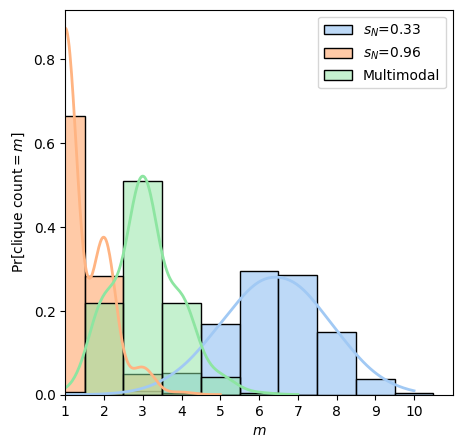

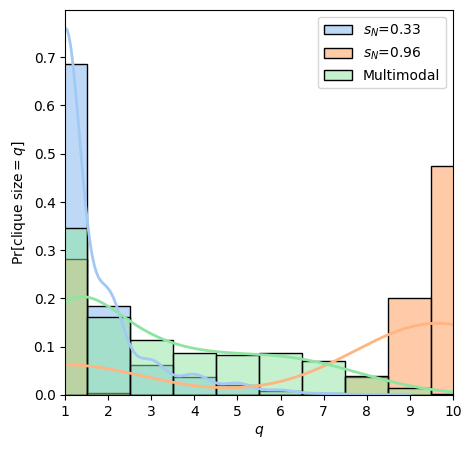

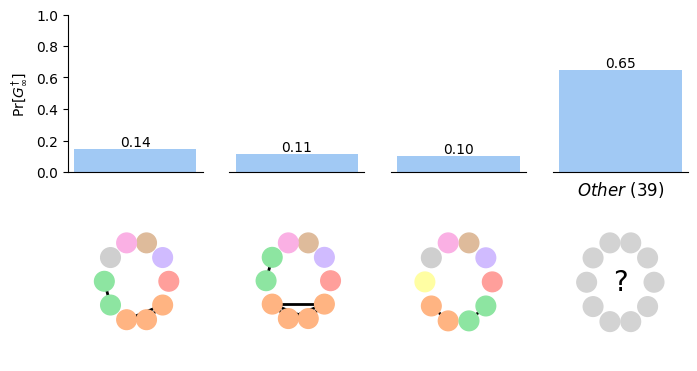

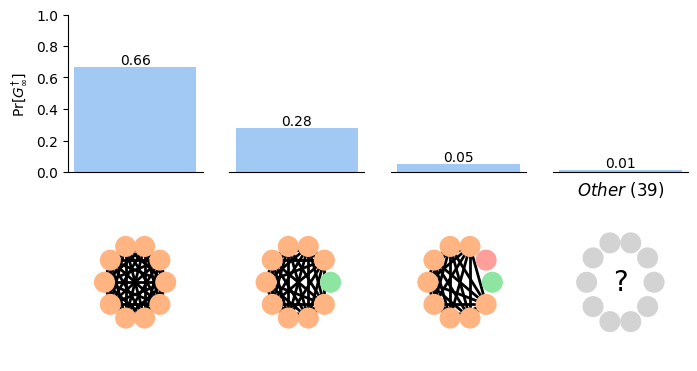

In [34]:
# 4 states 8 walkers, complete graph topology
colors = sns.color_palette('pastel')
alpha = 0.5
kde = True
kde_smoothing_factor = 5
max_clique_size = 1
N = 15
M = 10
k = 3

fig_clique_count, ax_clique_count = plt.subplots(figsize=(5, 5))
ax_clique_count.set_xlabel(r'$m$')
ax_clique_count.set_ylabel(r'$\Pr[\text{clique count} = m]$')
fig_clique_size, ax_clique_size = plt.subplots(figsize=(5, 5))
ax_clique_size.set_xlabel(r'$q$')
ax_clique_size.set_ylabel(r'$\Pr[\text{clique size} = q]$')



sink_node_proba_vec = [5/N, 0.96]

for idx, sink_node_proba in enumerate(sink_node_proba_vec):
    sink_node_proba = round(sink_node_proba, 2)
    steady_state_vector = np.ones(N) * (1 - sink_node_proba) / (N - 1)
    steady_state_vector[0] = sink_node_proba
    pi = steady_state_vector
    print(f'Stationary distribution: {pi}')



    s_k = torch.tensor(np.repeat(pi, M).reshape(N, M))
    walker_agnostic = True
    model = RWIG(walker_agnostic=walker_agnostic)
    distribution = model.generate_contact_network_distribution(s_k)
    proba_sum = sum([sample['probability'] for sample in distribution.values()])
    print(f'Probability sum: {proba_sum}')
    model.plot_topk_contact_networks(k)
    clique_size = model.clique_size_distribution(distribution, True)
    max_clique_size = max(max_clique_size, max(clique_size))
    clique_count = model.clique_count_distribution(distribution, True)
    
    sns.histplot(clique_size, kde=kde, 
                 label=r'$s_N$' + f'={sink_node_proba}', 
                 color=sns.color_palette('pastel')[idx], 
                 stat='density', 
                 ax=ax_clique_size, alpha=0.7,
                 log_scale=False,
                 discrete=True,
                 bins=20,
                 line_kws={'linewidth':2},
                 kde_kws={'bw_adjust': kde_smoothing_factor,
                          }
                 )
    
    sns.histplot(clique_count, kde=kde, 
                 label=r'$s_N$' + f'={sink_node_proba}', 
                 color=sns.color_palette('pastel')[idx], 
                 stat='probability', 
                 ax=ax_clique_count, alpha=0.7,
                 log_scale=False,
                 discrete=True,
                 line_kws={'linewidth':2},
                 kde_kws={'bw_adjust': kde_smoothing_factor,
                          }
                 )


# | Custom k sink node proba
s_p = 0.32
k = 3
sink_nodes_arr = [0.6, 0.25, 0.1]
arr = sink_nodes_arr + [(1 - sum(sink_nodes_arr)) / (N - k)] * (N - k)
print(len(arr))
print(sum(arr))
s_k = torch.tensor(np.repeat(np.array(arr), M).reshape(N, M))
# print(f's_k: {s_k}')
walker_agnostic = True
model = RWIG(walker_agnostic=walker_agnostic)
distribution = model.generate_contact_network_distribution(s_k)
proba_sum = sum([sample['probability'] for sample in distribution.values()])
print(f'Probability sum: {proba_sum}')
# model.plot_topk_contact_networks(k)
clique_size = model.clique_size_distribution(distribution, True)
max_clique_size = max(max_clique_size, max(clique_size))
clique_count = model.clique_count_distribution(distribution, True)
sns.histplot(clique_size, discrete=True, ax=ax_clique_size,
                 stat='probability',
                  kde=kde, color=colors[idx+1], label=f'Multimodal',
                  alpha=alpha,
                    line_kws={'linewidth':2},
                  kde_kws={'bw_adjust': kde_smoothing_factor})
sns.histplot(clique_count, discrete=True, ax=ax_clique_count,
                 stat='probability', kde=kde, color=colors[idx+1], label=f'Multimodal',
                 alpha=alpha,
                 line_kws={'linewidth':2},
                 kde_kws={'bw_adjust': kde_smoothing_factor,
                          })

ax_clique_size.legend()
ax_clique_count.legend()

ax_clique_count.set_xticks(range(1, M+1))
ax_clique_size.set_xticks(range(1, max_clique_size+1))
ax_clique_count.set_xlim(1, M+1)
ax_clique_size.set_xlim(1, max_clique_size)

s_k: tensor([[0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000]], dtype=torch.float64)
Num of contact graphs: 8
Probability sum: 1.0
[N=2][M=4] 


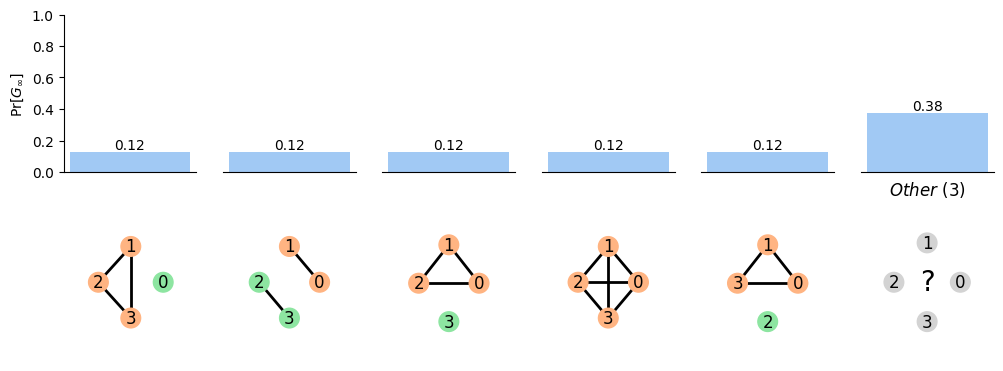

In [3]:
M = 4
N = 2
pi = np.ones(N) * (1 - 0.5) / (N - 1)
s_k = torch.tensor(np.repeat(pi, M).reshape(len(pi), M))
print(f's_k: {s_k}')
walker_agnostic = True
model = RWIG(walker_agnostic=False)
distribution = model.generate_contact_network_distribution(s_k)
print(f'Num of contact graphs: {len(distribution)}')
proba_sum = sum([sample['probability'] for sample in distribution.values()])
print(f'Probability sum: {proba_sum}')
model.plot_topk_contact_networks(5)

s_k: tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000]],
       dtype=torch.float64)
Probability sum: 1.0
[N=2][M=8] 


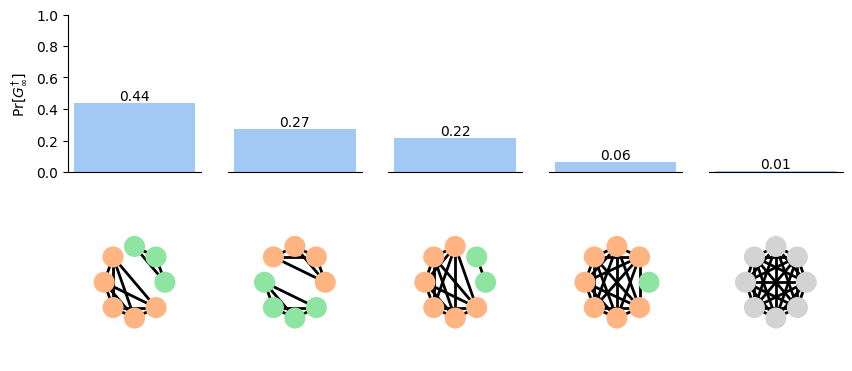

In [4]:
M = 8
s_k = torch.tensor(np.repeat(pi, M).reshape(len(pi), M))
print(f's_k: {s_k}')
walker_agnostic = True
model = RWIG(walker_agnostic=walker_agnostic)
distribution = model.generate_contact_network_distribution(s_k)
proba_sum = sum([sample['probability'] for sample in distribution.values()])
print(f'Probability sum: {proba_sum}')
model.plot_topk_contact_networks(5)

Stationary distribution: [0.1 0.1 0.1 0.7]
s_k: tensor([[0.1000, 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000],
        [0.7000, 0.7000, 0.7000, 0.7000]], dtype=torch.float64)
Probability sum: 1.0
[N=4][M=4] 


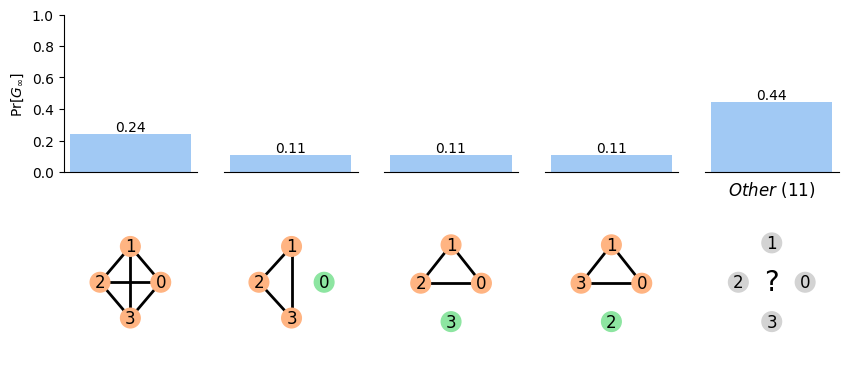

In [33]:
#Heavy sink node markov graph. to see if people converge to the sink node
# 4 state markov chain
P = np.array([[0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1],
              [0.7, 0.7, 0.7, 0.7]])
mc = markovChain(P.T)  # Transpose P to get column-stochastic
mc.computePi('linear')  # Compute stationary distribution
pi = mc.pi
# pi = np.array([0.1, 0.4, 0.5])
# pi = np.array([0.0, 0.51, 0.49])
print(f'Stationary distribution: {pi}')
M = 4
s_k = torch.tensor(np.repeat(pi, M).reshape(len(pi), M))
print(f's_k: {s_k}')
walker_agnostic = False
model = RWIG(walker_agnostic=walker_agnostic)
distribution = model.generate_contact_network_distribution(s_k)
proba_sum = sum([sample['probability'] for sample in distribution.values()])
print(f'Probability sum: {proba_sum}')
model.plot_topk_contact_networks(4)